# Salary Dataset Exploration

## 1. Dataset Overview

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/salaries.csv')    
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


,work_year,salary,salary_in_usd,remote_ratio
count,136757.000000,1.367570e+05,136757.000000,136757.000000
mean,2024.374686,1.630432e+05,157490.722756,20.909716
std,0.679644,2.150435e+05,74173.546839,40.594326
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105900.000000,0.000000
50%,2024.000000,1.470000e+05,146000.000000,0.000000
75%,2025.000000,1.988000e+05,197800.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


## 2. Data Cleaning

In [11]:
exp_map = {'EN':'Entry', 'MI':'Mid', 'SE':'Senior', 'EX':'Executive'}
emp_map = {'FT':'Full-time', 'PT':'Part-time', 'CT':'Contract', 'FL':'Freelance'}
size_map = {'S':'Small', 'M':'Medium', 'L':'Large'}

df['experience_level'] = df['experience_level'].map(exp_map)
df['employment_type'] = df['employment_type'].map(emp_map)
df['company_size'] = df['company_size'].map(size_map)

df.drop_duplicates(inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,Mid,Full-time,Data Scientist,132600,USD,132600,US,100,US,Medium
1,2025,Mid,Full-time,Data Scientist,102000,USD,102000,US,100,US,Medium
2,2025,Senior,Full-time,Data Product Manager,260520,USD,260520,US,0,US,Medium
3,2025,Senior,Full-time,Data Product Manager,140280,USD,140280,US,0,US,Medium
4,2025,Senior,Full-time,Machine Learning Engineer,215000,USD,215000,US,0,US,Medium


In [18]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


## 3. Visual Analysis

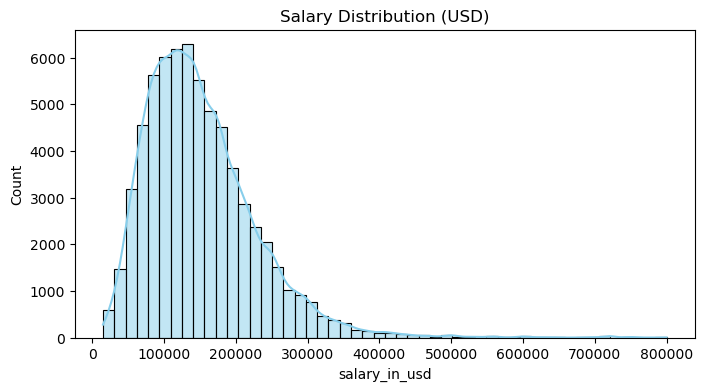

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df['salary_in_usd'], kde=True, bins=50, color='skyblue')
plt.title('Salary Distribution (USD)')
plt.show()

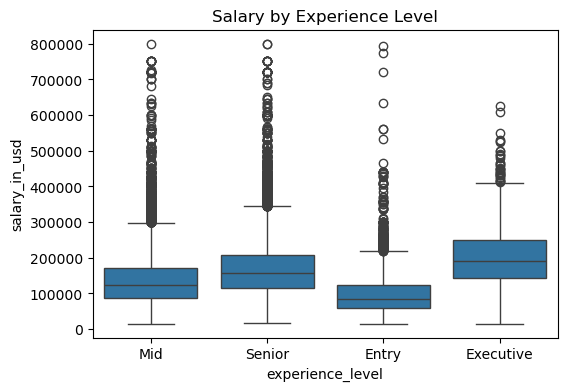

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by Experience Level')
plt.show()

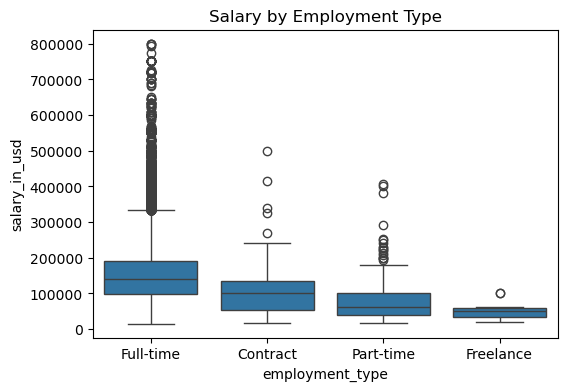

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary by Employment Type')
plt.show()

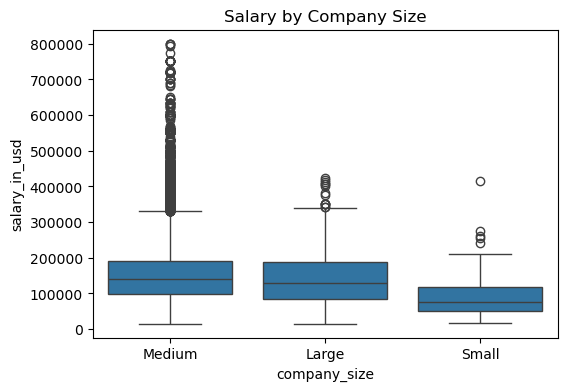

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary by Company Size')
plt.show()

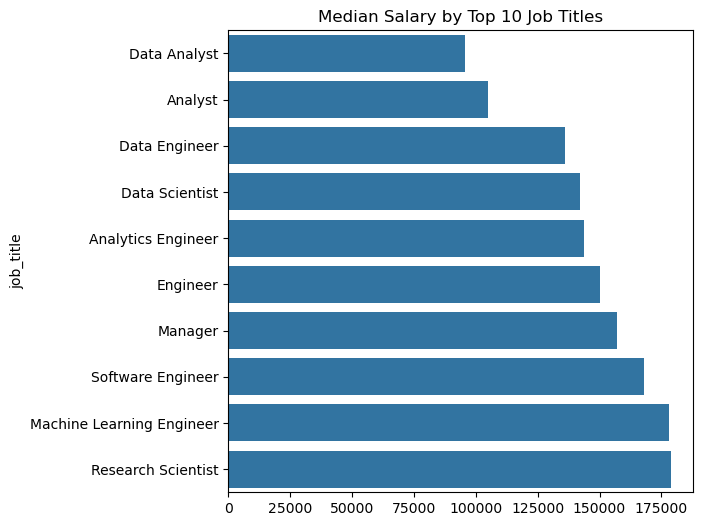

In [17]:
top_titles = df['job_title'].value_counts().head(10).index
df_top = df[df['job_title'].isin(top_titles)]
avg_salary = df_top.groupby('job_title')['salary_in_usd'].median().sort_values()
plt.figure(figsize=(6,6))
sns.barplot(x=avg_salary.values, y=avg_salary.index)
plt.title('Median Salary by Top 10 Job Titles')
plt.show()

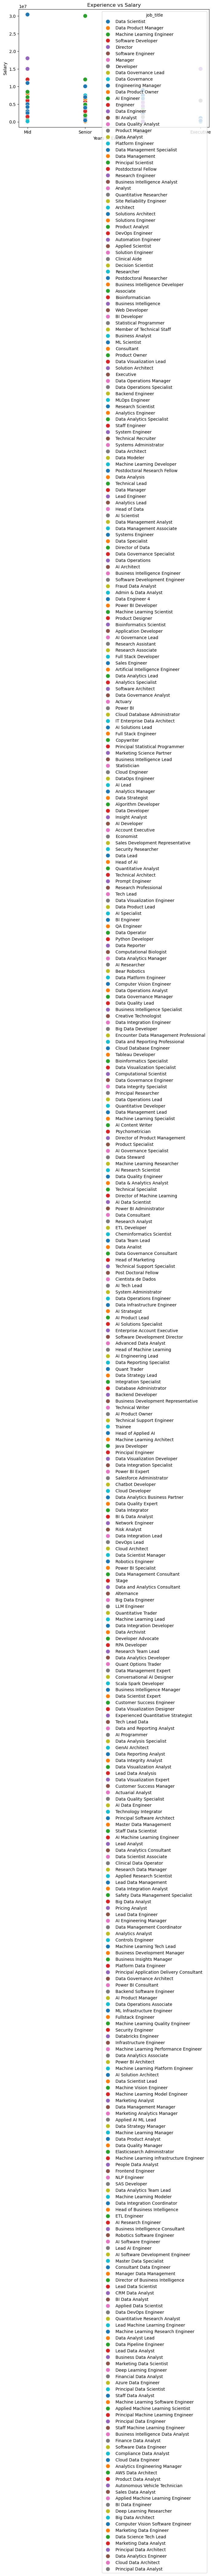

In [24]:
# Experience vs Salary Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='experience_level', y='salary', hue='job_title', palette='tab10', s=100)
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_35252\1954885589.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='experience_level', y='salary', color='skyblue', palette='tab10', s=100)


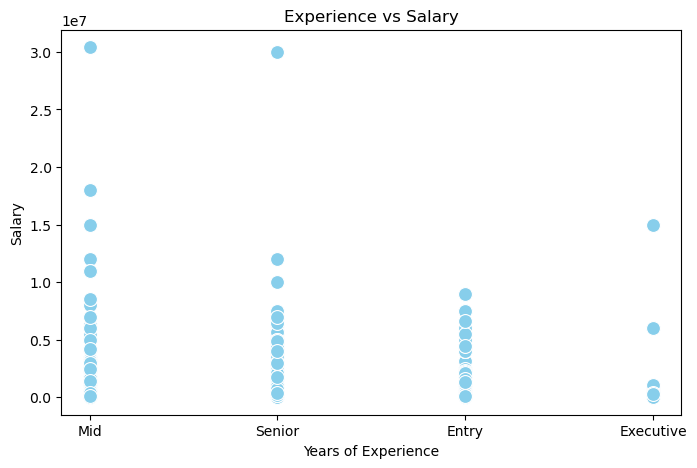

In [25]:
# Experience vs Salary Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='experience_level', y='salary', color='skyblue', palette='tab10', s=100)
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

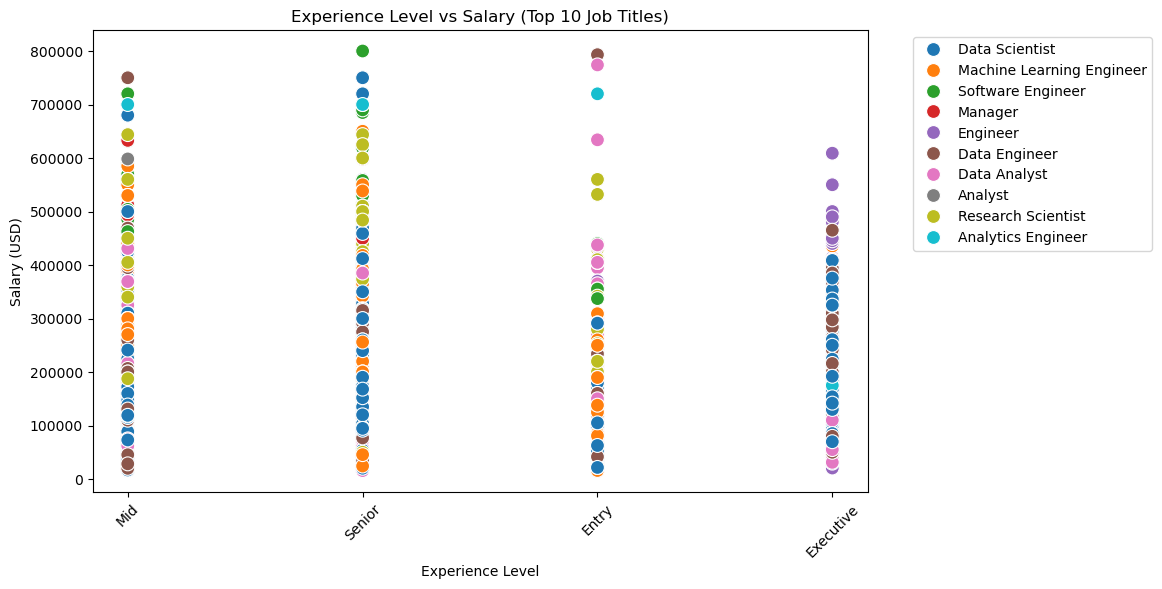

In [26]:
#Experience Level vs Salary Scatter Plot (Top 10 Job Titles)
top_jobs = df['job_title'].value_counts().nlargest(10).index
df_top = df[df['job_title'].isin(top_jobs)]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_top,
    x='experience_level',
    y='salary_in_usd',
    hue='job_title',
    palette='tab10',
    s=100
)
plt.title('Experience Level vs Salary (Top 10 Job Titles)')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [28]:
#Job Title-wise Average Salary
title_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nAverage Salary by Job Title:")
print(title_salary)


Average Salary by Job Title:
job_title
Research Team Lead                  450000.0
Analytics Engineering Manager       399880.0
Data Science Tech Lead              375000.0
Applied AI ML Lead                  292500.0
IT Enterprise Data Architect        284090.0
                                      ...   
Clinical Aide                        36928.5
AI Software Development Engineer     25210.0
Analytics Analyst                    24000.0
AI Engineering Lead                  23649.0
Alternance                           19825.0
Name: salary_in_usd, Length: 398, dtype: float64


C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_35252\4267987116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.index, y=top_titles.values, palette='viridis')


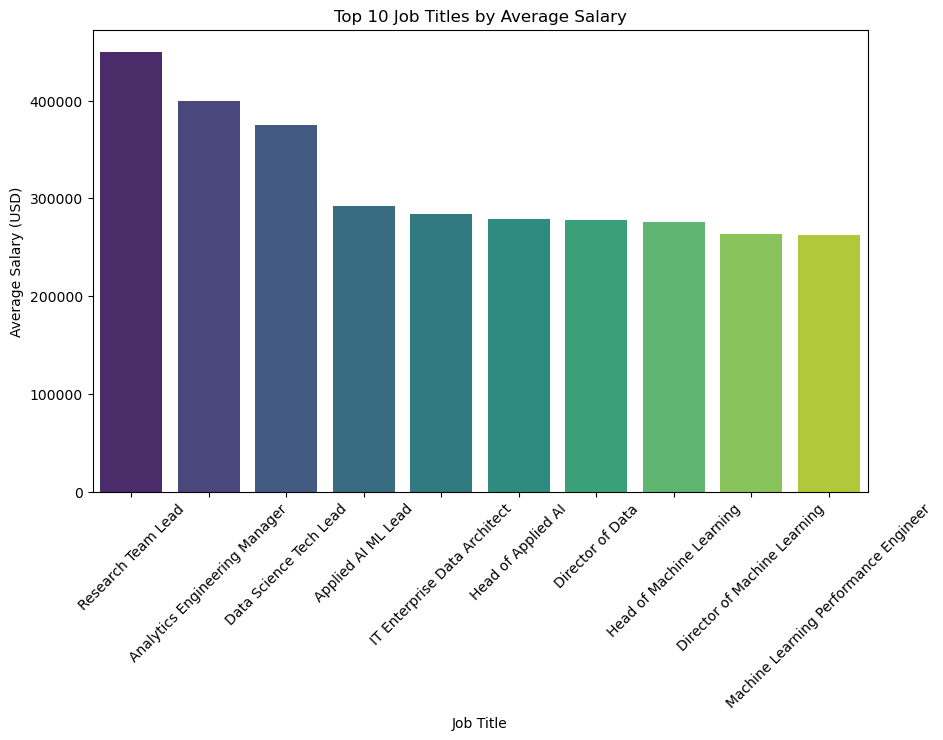

In [ ]:
#Bar Plot for Job Title-wise Average Salary (Top 10)
top_titles = title_salary.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_titles.index, y=top_titles.values, palette='viridis')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()